<a href="https://colab.research.google.com/github/DSNortsev/CSE-694-Case-Studies-in-Deep-Learning/blob/master/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

data = sns.load_dataset("iris")

## __Task 1.	Brief description on its value and possible applications.__
The IRIS dataset has the following characteristcs:
* 150 examples of Iris flowers 
* The first four fields are features that are the characteristics of flowers example. All these fileds hold float numbers representing flower measurements.
* The last column is the lable which represents the Iris species.
* Balance class disctibution meaning that each category has event amount of instacnes
* Has no missing values


One example of possible application is for botanists to find an automated way to categorize each Iris flower they find. For instance, to classify based on photgraphs, or in our case based on the length and width measurements of their sepals and petals.

In [51]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [52]:
print(f'CLASS DISTRIBUTION:\n{data.groupby("species").size()}')
print(f'\nSHAPE: {data.shape}')
print(f'\nTOTAL MISSING VALUES:\n{data.isnull().sum()}\n')

CLASS DISTRIBUTION:
species
setosa        50
versicolor    50
virginica     50
dtype: int64

SHAPE: (150, 5)

TOTAL MISSING VALUES:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64



_________

## __Task 2.	Summarize and visually report on the Size of this data set including labeling or non-labeled status__


For all three species, the respective values of the mean and median of it’s features are found to be pretty close. This indicates that data is nearly symmetrically distributed with very less presence of outliers.

In [ ]:
data.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width  ... petal_length petal_width       
                   mean median        mean  ...       median        mean median
species                                     ...                                
setosa            5.006    5.0       3.428  ...         1.50       0.246    0.2
versicolor        5.936    5.9       2.770  ...         4.35       1.326    1.3
virginica         6.588    6.5       2.974  ...         5.55       2.026    2.0

[3 rows x 8 columns]

Standard deviation (or variance) is an indication of how widely the data is spread about the mean.

In [ ]:
data.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


The isolated points for each feature that can be seen in the box-plots below are the outliers in the data. Since these are very few in number, it wouldn't have any significant impact on our analysis.

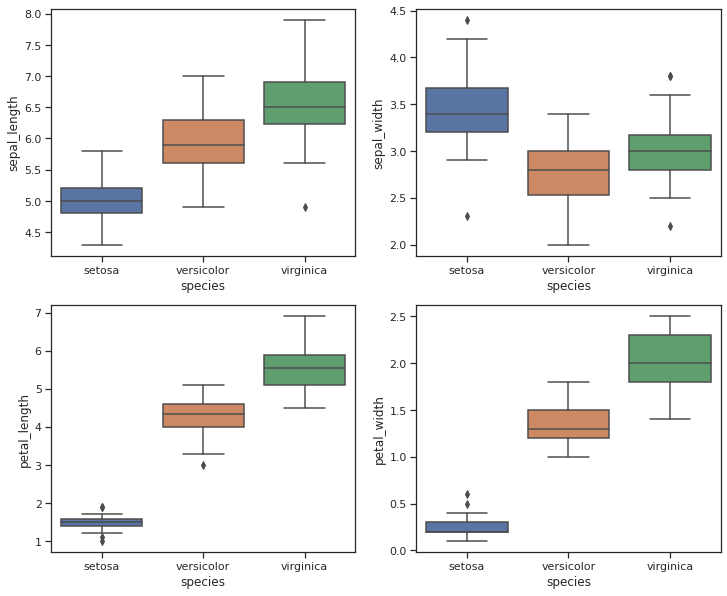

In [ ]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=data)
plt.show()

Scatter plot helps to analyze the relation ship between 2 features on x and y axis.

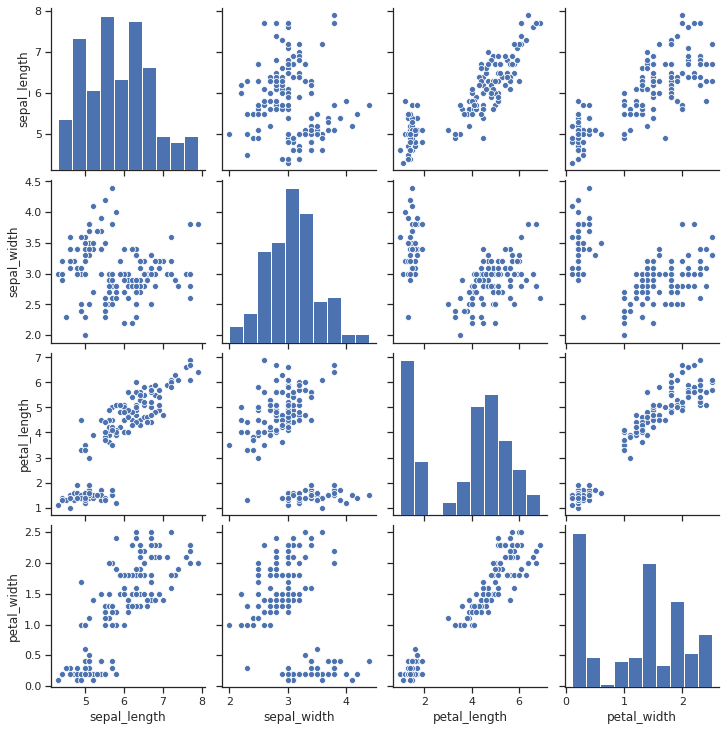

In [ ]:
sns.pairplot(data)

Next, we can make a correlation matrix to see how these features are correlated to each other using heatmap in seaborn library. It can be observed that petal measurements are highly correlated, while the sepal one are uncorrelated. Also we can see that petal length is highly correlated with speal length, but not with sepal width.

[]

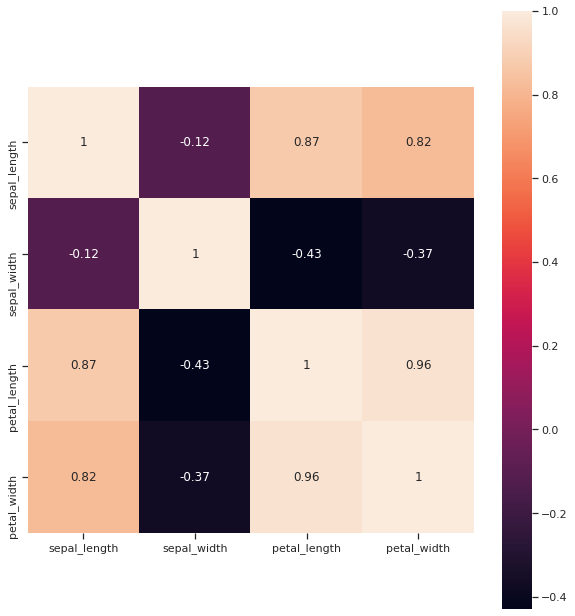

In [49]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True, square = True)
plt.plot()

Another way to visualize the data is by parallel coordinate plot, which represents each row as a line. As we have seen below, petal measurements can separate species better than the sepal ones.

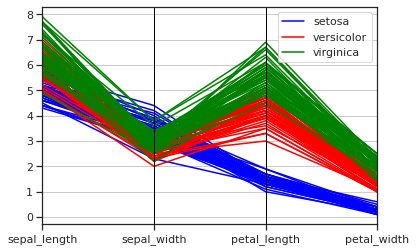

In [56]:
parallel_coordinates(data, "species", color = ['blue', 'red', 'green']);

Now, we can plot a scatter plot between the sepal length and the sepal width to visualise the iris dataset. We can observe that the blue dots(setosa) are quite clear seperated from red(versicolor) and green dots(virginica), while seperattion between red dots and green dots might be a very difficult task given the two features available.

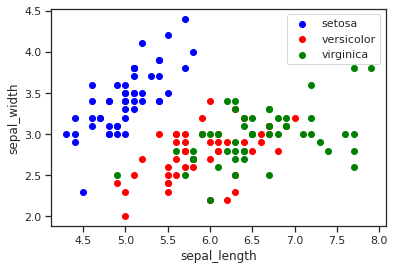

In [77]:
labels_names = { 'setosa': 'blue',
                'versicolor': 'red',
                'virginica': 'green'}

for species, color in labels_names.items():
  x = data.loc[data['species'] == species]['sepal_length']
  y = data.loc[data['species'] == species]['sepal_width']
  plt.scatter(x, y, c=color)
plt.legend(labels_names.keys())
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

We can also visualise the data on different features such as petal width and petal length. In this case, the decision boundary between blue, green and red dots can be easily determined, which indicates that using all features for training is a good choice. 

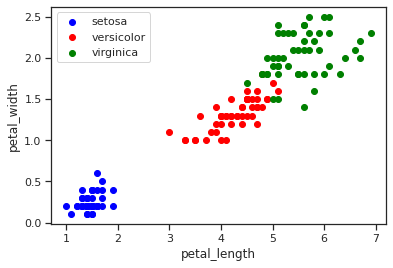

In [86]:
labels_names = { 'setosa': 'blue',
                'versicolor': 'red',
                'virginica': 'green'}

for species, color in labels_names.items():
  x = data.loc[data['species'] == species]['petal_length']
  y = data.loc[data['species'] == species]['petal_width']
  plt.scatter(x, y, c=color)
plt.legend(labels_names.keys())
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

___________
## **3.	Propose and perform Deep Learning using this data set.**
Report on your implementation as follows:
* Justify your selection of techniques and platform
* Explain your results and their applicability


In [ ]:
# import load_iris function from datasets module
# convention is to import modules instead of sklearn as a whole
from sklearn.datasets import load_iris


In [ ]:
# save "bunch" object containing iris dataset and its attributes
# the data type is "bunch"
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [ ]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# print integers representing the species of each observation
# 0, 1, and 2 represent different species
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris


{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

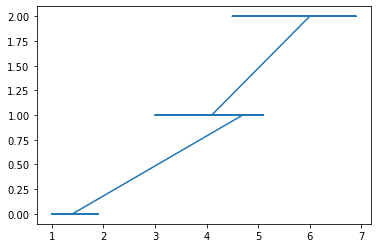

In [ ]:
import matplotlib.pyplot as plt

x = map(iris['target'], {0: 'setosa', 1: 'versicolor', 2: 'virginica' })

plt.plot(iris['data'][:,2],iris['target'],)



<BarContainer object of 150 artists>

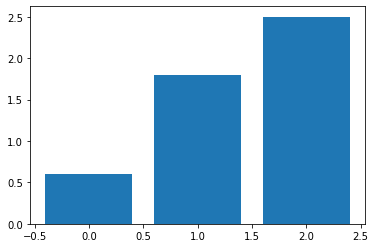

In [ ]:
plt.bar(iris['target'], iris['data'][:,3])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
# data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])
# # data= np.c_[iris['data'], iris['target']]
# # iris['feature_names'] + ['target']
# data1
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df.head()


# data = load_iris()
# df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df['target'] = data['target']
# df.head()

import seaborn
iris = seaborn.load_dataset("iris")
type(iris)

import plotly.express as px



px.scatter(iris,x='species',y='petal_width', size = 'petal_width')



In [ ]:
px.bar(iris['species'],iris['petal_width'])

In [ ]:
px.bar(iris,x='species',y='petal_width')

In [ ]:

px.line(iris,x='species',y='petal_width')
